In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

: 

In [203]:
#Load the dataset (csv file) into a Pandas DataFrame.
df=pd.read_csv('helloDataset.csv',sep=';')

In [6]:
#Print the list of all students whose first name starts with letter the 'H'
names=[]
for name in df['Name']:
    result=re.match("^[Hh]",name)
    if result:
        names.append(name)
print(names)  

['Hamza Naveed', 'Habib Ullah', 'Hunain Javed', 'Hafiz Malahim Labib.', 'HAMNA TARIQ SALEEMI', 'Hina', 'Hamza Javed Khan', 'Husnain Ahmed ', 'Hamayoun Masroor', 'Hussain afzal']


In [23]:
#Print the total number of students who have a three words name (first-middle-surname)
names=[]
for name in df['Name']:
    result=re.match("[A-Za-z]+\s[A-Za-z]+\s[A-Za-z]+\s?$",name)
    if result:
        names.append(name)
print(names)

['Syeda Maham Gillani', 'Shahzada Mujahid Raza', 'Muhammad Subhan Khan ', 'SARMAD WAHEED AHMED ', 'M Hassaan Lateef ', 'Ahmed Amjad Dar ', 'Muhammad Ibrahim Khalil', 'Muhammad saim jamil', 'Ahmar Hafeez Khan', 'Muhammad Umar Asghar', 'MUHAMMAD HAIDER AWAN', 'Muhammad Ammar Khalid', 'Osama Nadeem Khan ', 'Muhammad Hashir Azeem', 'Muhammad Aun Raza', 'HAMNA TARIQ SALEEMI', 'Bashara Tehseen Liaqat', 'Muhammad Hammad Ejaz', 'MUHAMMAD SAIF ULLAH', 'Muhammad Al Fahad', 'Abdul Hadi Khan', 'Hamza Javed Khan', 'GHULAM MUSTAFA SHIEKH', 'Muhammad Azeem Shoukat ', 'Muhammad Nouman Tahir', 'Muhammad Huzaifa Jawad', 'NOOR TARIQ RANA', 'Muhammad Asadullah Rind', 'Muhammad Talha Saeed', 'Muhammad Bilal Aslam', 'Syed Ali Mehdi', 'Aftab Ahmad Khan', 'Syed Zain Raza', 'Muhammad Umair Tariq ', 'M Abubakar Malik']


In [ ]:
#Print the percentage of students who have a CGPA of 3.0 or above
totalCGPA=0.0
count=0
count1=0
for cgpa in df['CGPA']:
    if float(cgpa)>=3.0:
        count+=1
    count1+=1
print(count/count1*100)

26.119402985074625


21


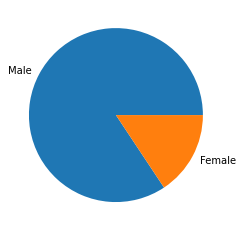

In [5]:
# Plot a pie chart to show the ratio of male and female students.
male=0
female=0
for gender in df['Gender']:
    if gender=='Male':
        male+=1
    if gender=='Female':
        female+=1
genders=[male,female]
g=['Male','Female']
plt.pie(genders, labels=g)
plt.show()

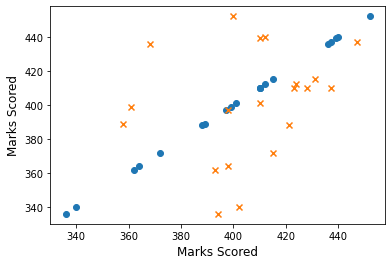

In [365]:
boys=[]
girls=[]
flag=1
count1=0
count=0
for gender,marks in zip(df['Gender'],df["HSSC-1"]):
    if gender=="Male" and count<20 and marks<505:
        boys.append((marks))
        count+=1
    if gender=='Female' and count1<=21 and marks<505:
        girls.append((marks))
        count1+=1
ranges=boys
plt.scatter(boys,ranges,marker='o')
plt.scatter(girls,ranges,marker='x')
plt.xlabel('Marks Scored',fontsize=12)
plt.ylabel('Total Marks',fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

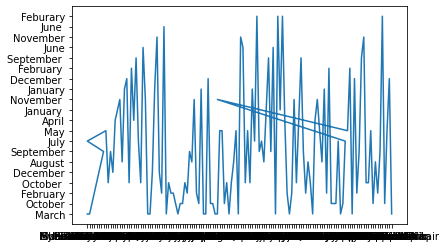

In [234]:
Students=[]
Month=[]

for student,month in zip(df['Name'],df["BirthMonth"]):
    Students.append(student)
    Month.append(month)

plt.plot(Students,Month)
plt.show

[[1.         0.13105377]
 [0.13105377 1.        ]]


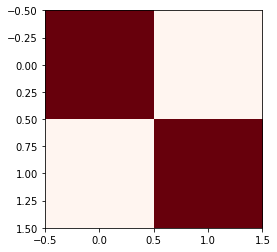

In [19]:



HSSC1=[]
HSSC2=[]

for hssc1,hssc2 in zip(df['HSSC-1'],df["HSSC-2"]):
    HSSC1.append(float(hssc1))
    HSSC2.append(float(hssc2))

matrix=np.corrcoef(HSSC1,HSSC2)
print(matrix)
plt.imshow(matrix,cmap="Reds",interpolation="nearest")
plt.show()

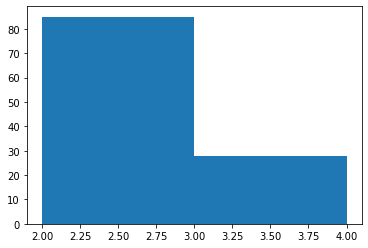

In [72]:

CGPA=[]
for cgpa,gender in zip(df['CGPA'],df["Gender"]):
    if gender=='Male':
        CGPA.append(float(cgpa))

binwidth=2
plt.hist(CGPA,bins=[2,3,4])
plt.show()

<AxesSubplot:xlabel='Gender'>

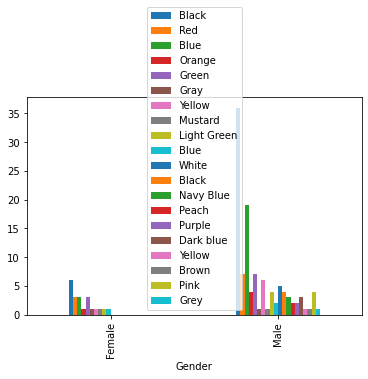

In [370]:

prevColor=[]
boys=[]
girls=[]
boys.append('Male')
girls.append('Female')
colorCount=[]
colorCount.append('Gender')
count=0
count1=0
for color in df["FavoriteColor"]:
    for color1,gender in zip(df['FavoriteColor'],df["Gender"]):
        if gender=="Male" and color1==color and color not in prevColor :
            count+=1
            if color not in colorCount:
                colorCount.append(color)
        if gender=="Female" and color1==color and color not in prevColor :
            count1+=1
            
            
    if count!=0:
        boys.append(count)
    if count1!=0:
        girls.append(count1)
    count=0
    count1=0
    prevColor.append(color)

Xaxis=np.arange(len(colorCount))
data = pd.DataFrame([girls,boys], columns=colorCount)
data.plot(x='Gender',kind='bar')
